**Problem Statement :**

**The prediction task is to determine whether a person makes over $50K a year.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.0)
sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#ADD8E6"})
sns.set_context("poster",font_scale = .4)

import warnings
warnings.filterwarnings('ignore')

In [2]:
income = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/refs/heads/master/census_income.csv')

In [3]:
# Copy the original dataset to another object
df = income.copy()

In [4]:
# Show the first five rows of the dataframe
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Show the last five rows of the dataframe
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Show the dimension of the dataframe
print('The Shape of the Dataset is : ',df.shape)

The Shape of the Dataset is :  (32560, 15)


In [7]:
# Show the data types of the dataframe
print('The datatypes are : \n' + '*'*30)
print(df.dtypes)

The datatypes are : 
******************************
Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


In [8]:
# Show the columns
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [9]:
# To check the missing value
print('Total Missing Values are : \n' + '*'*25)
print(df.isnull().sum())

Total Missing Values are : 
*************************
Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


**- By observation, there are no missing value present.**

In [10]:
# To check the duplicate value
print('Total Duplicate Values are : \n' + '*'*27)
print(df.duplicated().sum())

Total Duplicate Values are : 
***************************
24


**- By observation, the our dataset contains 24 duplicates value.Therefpre we remove it from our dataset.**

In [11]:
# remove thr duplicate value
df.drop_duplicates(inplace=True)

In [12]:
# again check the duplicate value
print('Total Duplicate Values are : \n' + '*'*27)
print(df.duplicated().sum())

Total Duplicate Values are : 
***************************
0


**- After handling the duplicates value,now there is no duplicate value present.**

In [13]:
# To check the unique value
print('The Unique Values are : \n' + '*'*25)
df.nunique().to_frame('No. of unique value')

The Unique Values are : 
*************************


,No. of unique value
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [14]:
# Show the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [15]:
# Show the statistical summary of data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**By observation,**

  **- the count of all numeric variable are same that means there is no missing value.**
  
   **- Mean value is greater than Median value in Age, Fnlwgt, Capital_gain, Capital_loss columns which indicates that the data is left skewed.**
   
   **- There are huge difference between 75% and max value in three columns it indicates that there may be outlier present.**

In [16]:
# Show the statistical summary of  categorical data
df.describe(include='object').T

,count,unique,top,freq
Workclass,32536,9,Private,22673
Education,32536,16,HS-grad,10494
Marital_status,32536,7,Married-civ-spouse,14970
Occupation,32536,15,Prof-specialty,4136
Relationship,32536,6,Husband,13187
Race,32536,5,White,27794
Sex,32536,2,Male,21774
Native_country,32536,42,United-States,29152
Income,32536,2,<=50K,24697


In [17]:
# Show the size of the dataset
df.size

488040

In [18]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

**- In out dataset the target variable is Income and we have to predict the income is >50k.It shows the two types '>50k' or '<=50k'.So, this is binary classification problem**.

**Feature Engineering**

In [19]:
df['Income'] = df['Income'].str.strip()

In [20]:
# convert target variable from categorical to numerical
df['income'] = df['Income'].map({'<=50K': 0, '>50K': 1})

# Data Extraction/Filtering

In [21]:
df['Sex'].value_counts()/len(df['Sex'])*100

 Male      66.922793
 Female    33.077207
Name: Sex, dtype: float64

**- In analysis we observe 67% are the Male individuals and only few individuals are female which is 33%.**

In [22]:
df['Marital_status'].value_counts()/len(df['Marital_status'])*100

 Married-civ-spouse       46.010573
 Never-married            32.782149
 Divorced                 13.649496
 Separated                 3.150357
 Widowed                   3.052004
 Married-spouse-absent     1.284731
 Married-AF-spouse         0.070691
Name: Marital_status, dtype: float64

**- In analysis shows that there are 32% are single individuals, 14% are divorced, 3% are already separated, 3% of female individuals are widow in our dataset.**

# EDA

**Univariate Analysis**

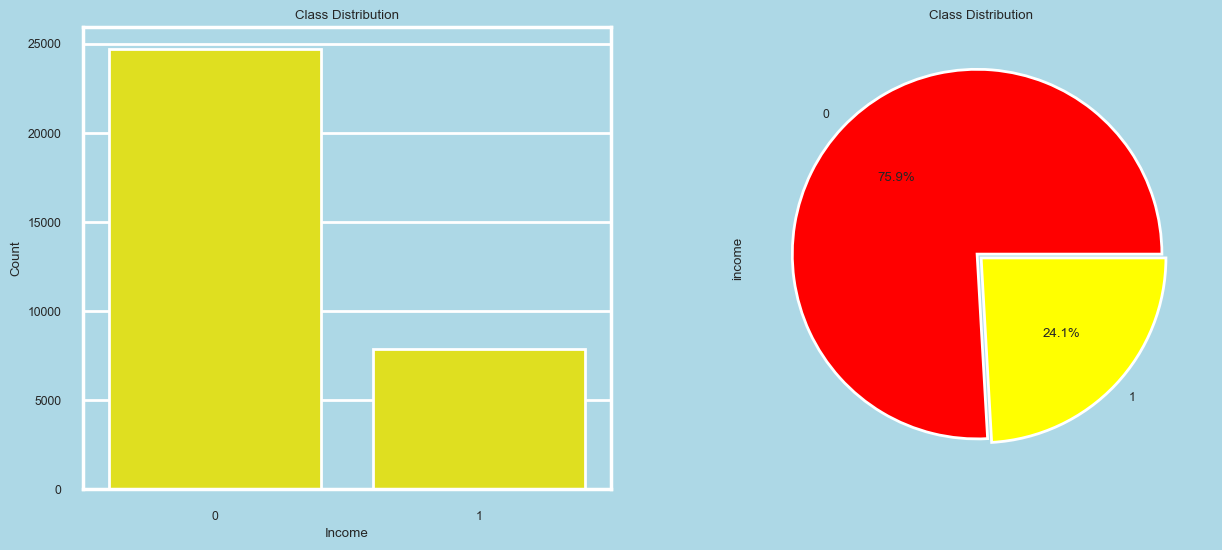

In [23]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='income', data=df, color='yellow',ax=axs[0])
axs[0].set_title('Class Distribution')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Count')

type_count = df['income'].value_counts()
type_count.plot.pie(ax=axs[1], autopct='%1.1f%%', explode=(0.03,0), colors=['red', 'yellow'])
axs[1].set_title('Class Distribution')


plt.show()

**- The counts of the class distribution for the target variable indicate data imbalance, so we need to balance this by oversampling.**

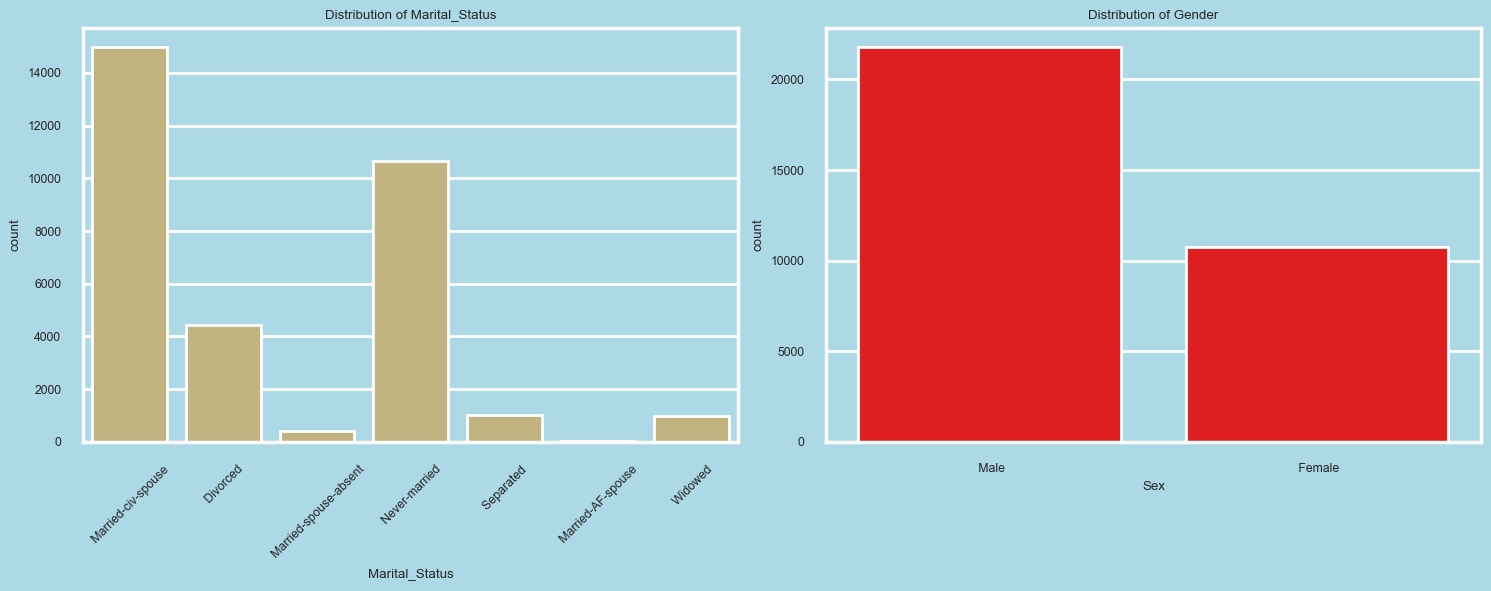

In [24]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Marital_status'], color='y', ax=axs[0])
axs[0].set_title('Distribution of Marital_Status')
axs[0].set_xlabel('Marital_Status')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Sex'], color='red', ax=axs[1])
axs[1].set_title('Distribution of Gender')
axs[1].set_xlabel('Sex')

plt.tight_layout()
plt.show()

**By the observation,**

**- The left count plot shows that, individuals are high count who are married to civilian spouse and unmarried individuals in our dataset as compared to other marital status.**

**- The right plot shows that, Male persons have high count in our dataset as compared to female person.**

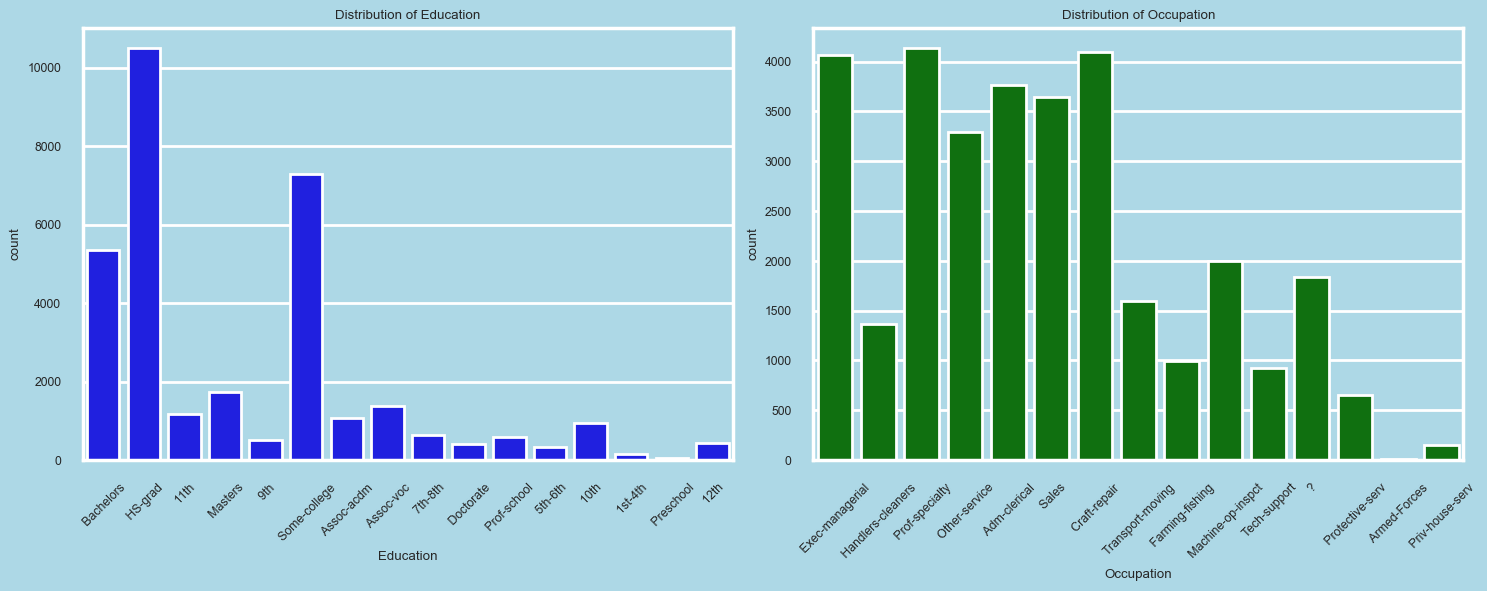

In [25]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Education'], color='blue', ax=axs[0])
axs[0].set_title('Distribution of Education')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Occupation'], color='green', ax=axs[1])
axs[1].set_title('Distribution of Occupation')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**By the observation,**

**- The left count plot shows that, Higher Secondary Grade individuals have high count in our dataset as compared to other education levels.**

**- The right plot shows that, Executive Managerial and professor and craft repairing individual's post have high count in our dataset as compared to other occupation.**

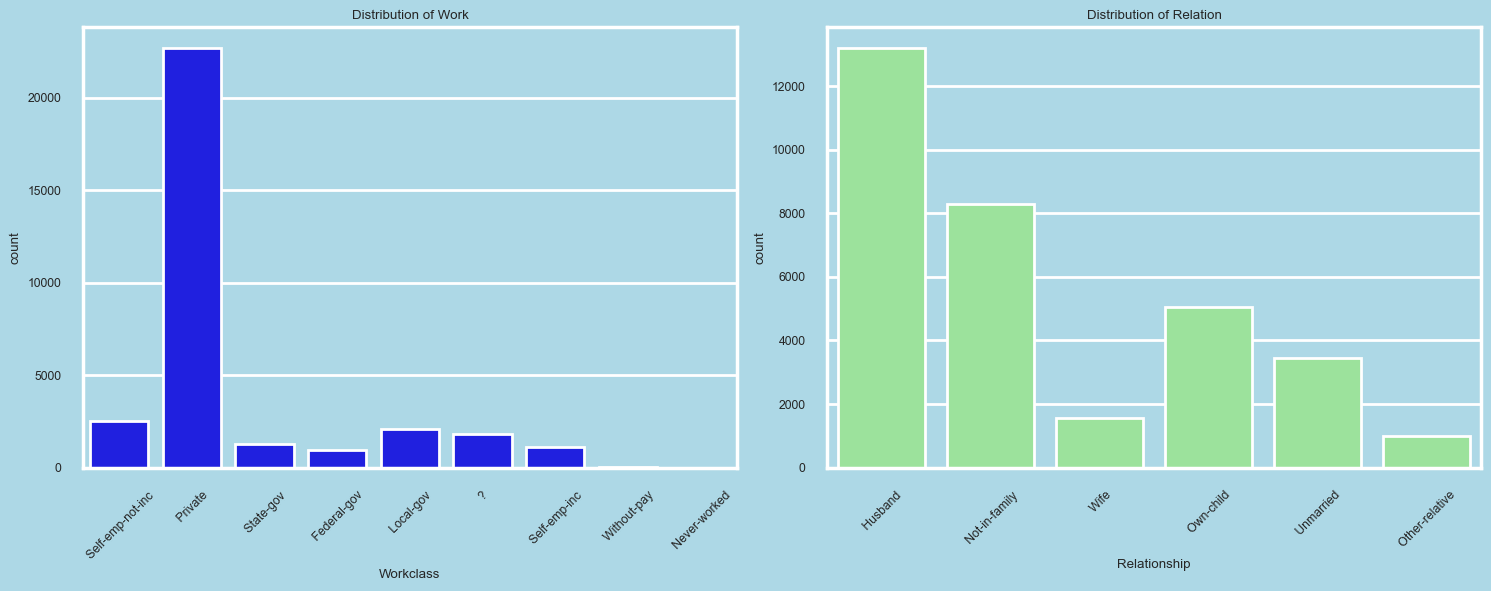

In [26]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Workclass'], color='blue', ax=axs[0])
axs[0].set_title('Distribution of Work')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Relationship'], color='lightgreen', ax=axs[1])
axs[1].set_title('Distribution of Relation')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**By the observation,**

**- The left count plot shows, Individuals that are high count in our dataset who are working in private company as compared to other work class.**

**- The right plot shows that, Male persons have high count in our dataset who are Husband as compared to other relation.**

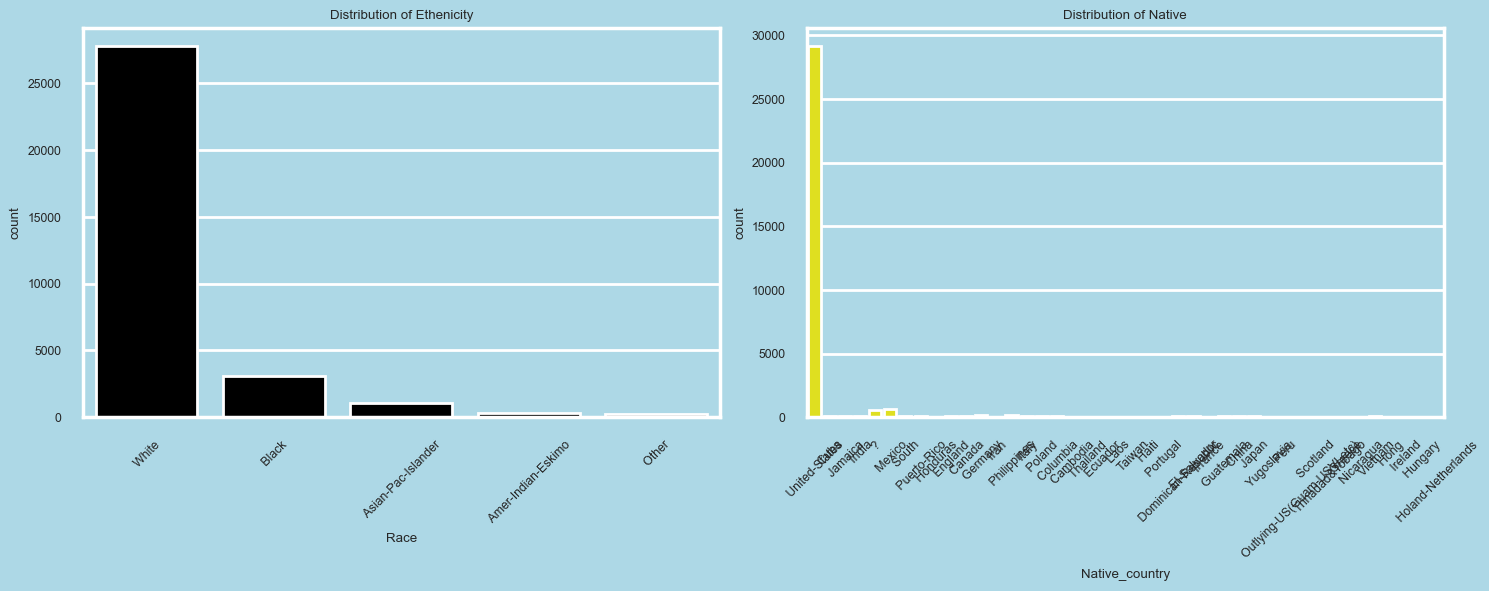

In [27]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Race'], color='black', ax=axs[0])
axs[0].set_title('Distribution of Ethenicity')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Native_country'], color='yellow', ax=axs[1])
axs[1].set_title('Distribution of Native')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**By the observation,**

**- The left count plot shows that, individuals are high count in our dataset who belongs into white race group as compared to other human group.**

**- The right plot shows that, Individuals have high count in our dataset who's native country is United State America as compared to other countries.**

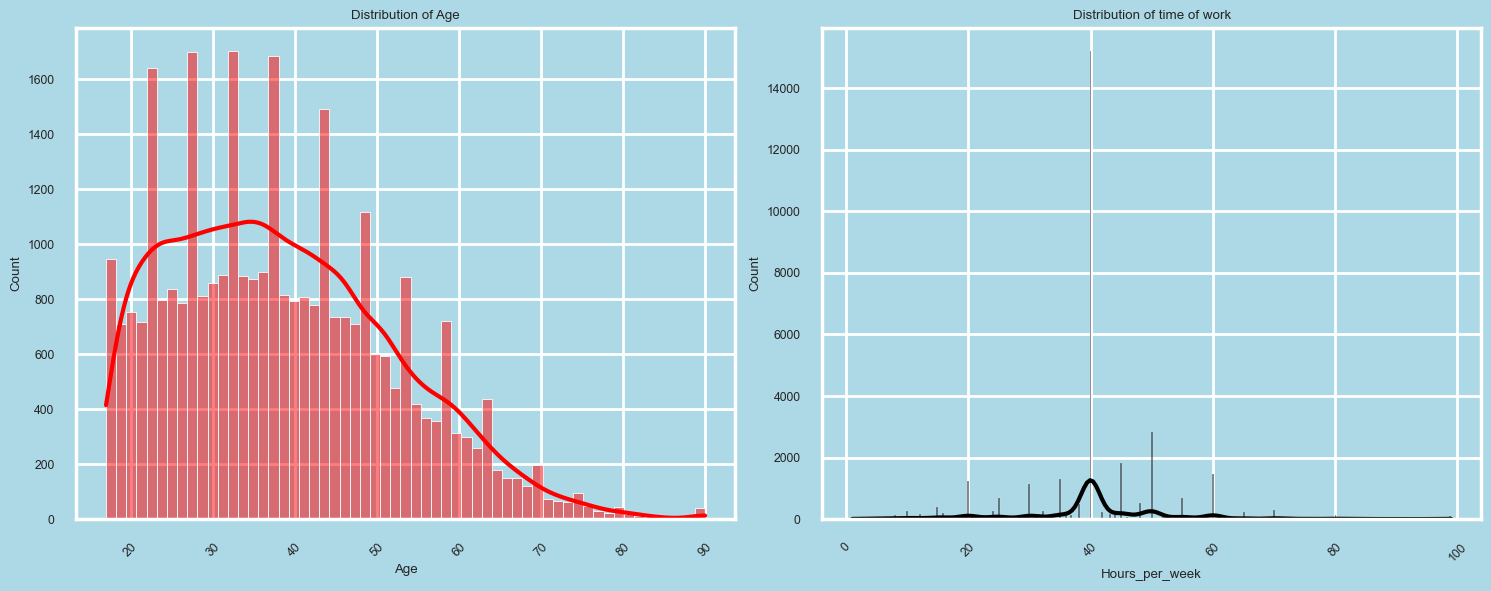

In [28]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(x=df['Age'], color='red', ax=axs[0], kde=True)
axs[0].set_title('Distribution of Age')
axs[0].tick_params(axis='x', rotation=45)

sns.histplot(x=df['Hours_per_week'], color='black', ax=axs[1], kde=True)
axs[1].set_title('Distribution of time of work')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**By the observation,**

**- The left count plot shows that, larger number of persons are belongs the age between 25 to 45 in our dataset.**

**- The right plot shows that, larger number of persons are work 50 hours per week in our dataset.**

**Bi-variate Analysis**

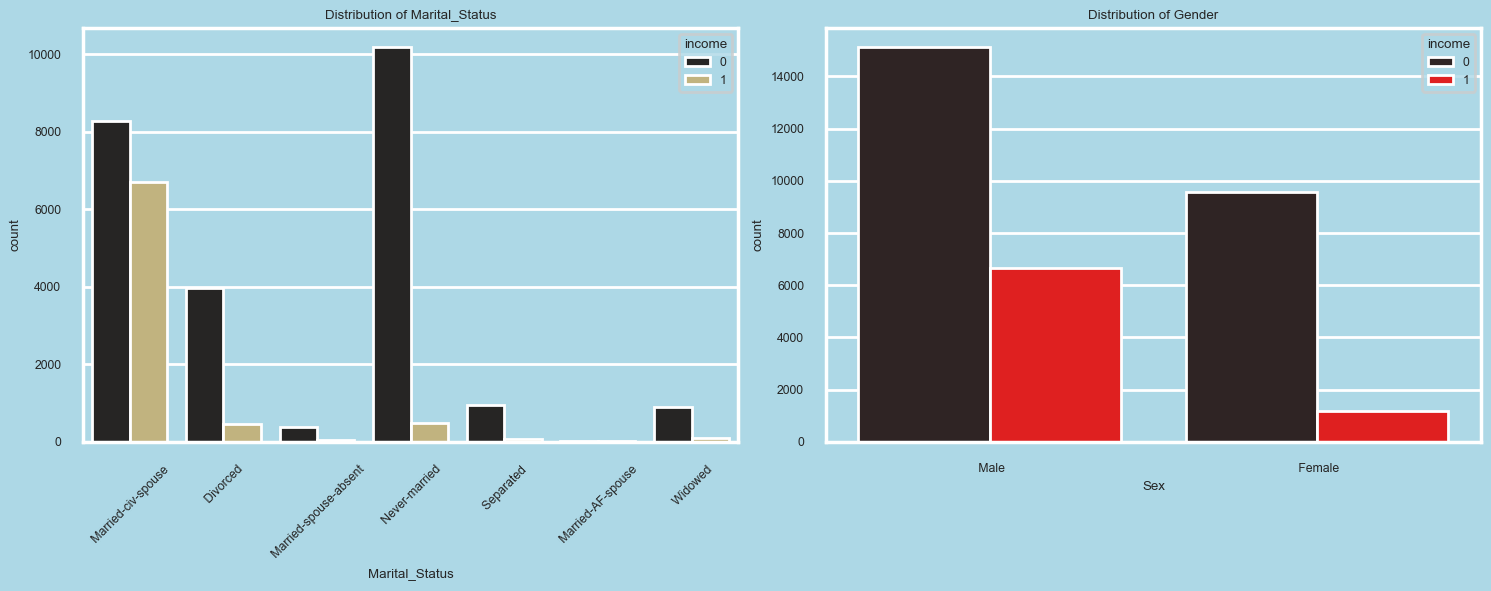

In [29]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=df['Marital_status'], color='y', ax=axs[0], hue= df['income'])
axs[0].set_title('Distribution of Marital_Status')
axs[0].set_xlabel('Marital_Status')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Sex'], color='red', ax=axs[1], hue= df['income'])
axs[1].set_title('Distribution of Gender')
axs[1].set_xlabel('Sex')

plt.tight_layout()
plt.show()

**By the observation,**

**- The left count plot shows that, individuals are high count who are marrian a civilian spouse and that person's income is greater than 50K in our dataset as compared to others.**

**- The right plot shows that, Individuals have high count in our dataset who are male and income also geater than 50K than  female persons.**

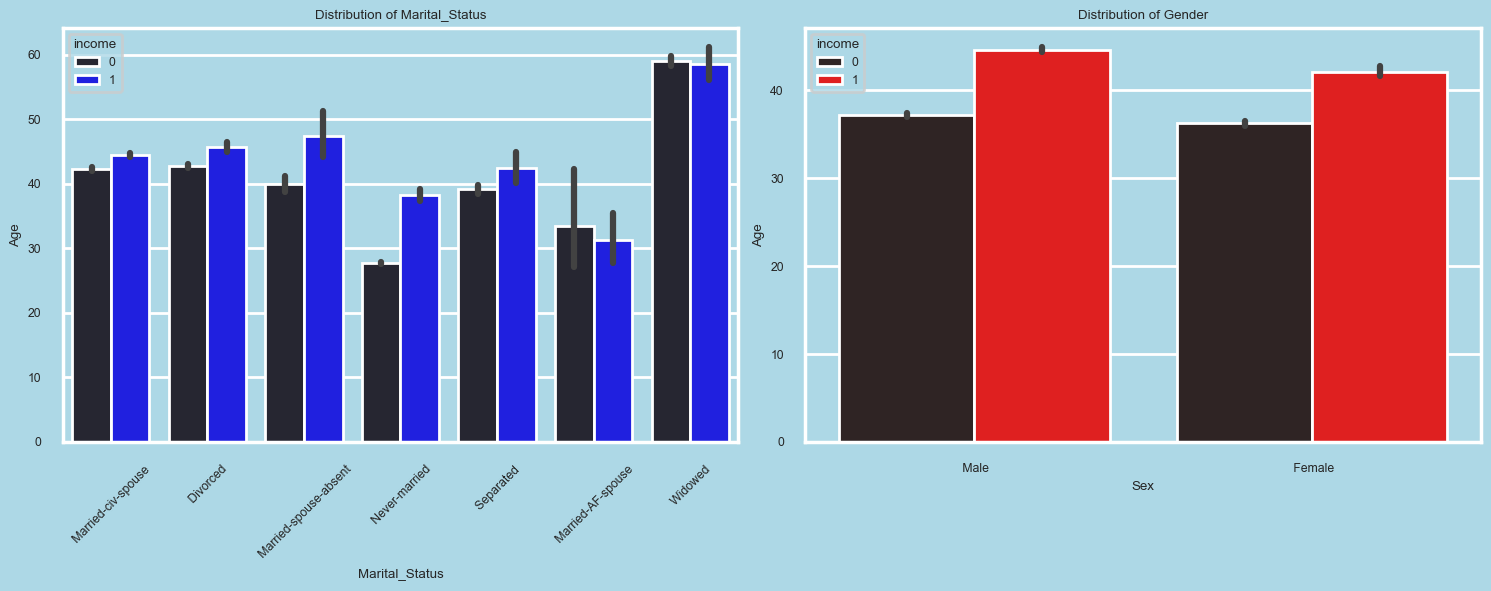

In [30]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=df['Marital_status'], y=df['Age'], color='blue', ax=axs[0], hue=df['income'])
axs[0].set_title('Distribution of Marital_Status')
axs[0].set_xlabel('Marital_Status')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x=df['Sex'], y=df['Age'], color='red', ax=axs[1], hue=df['income'])
axs[1].set_title('Distribution of Gender')
axs[1].set_xlabel('Sex')

plt.tight_layout()
plt.show()

**By the observation,**

**- The left count plot shows that, individuals income is geater than 50K who's age are above 50 and that individual are also widowed i.e female person in our dataset as compared to other.**

**- The right plot shows that, Male individuals have income greater than 50K who's age above 40 in our dataset as compared to female.**

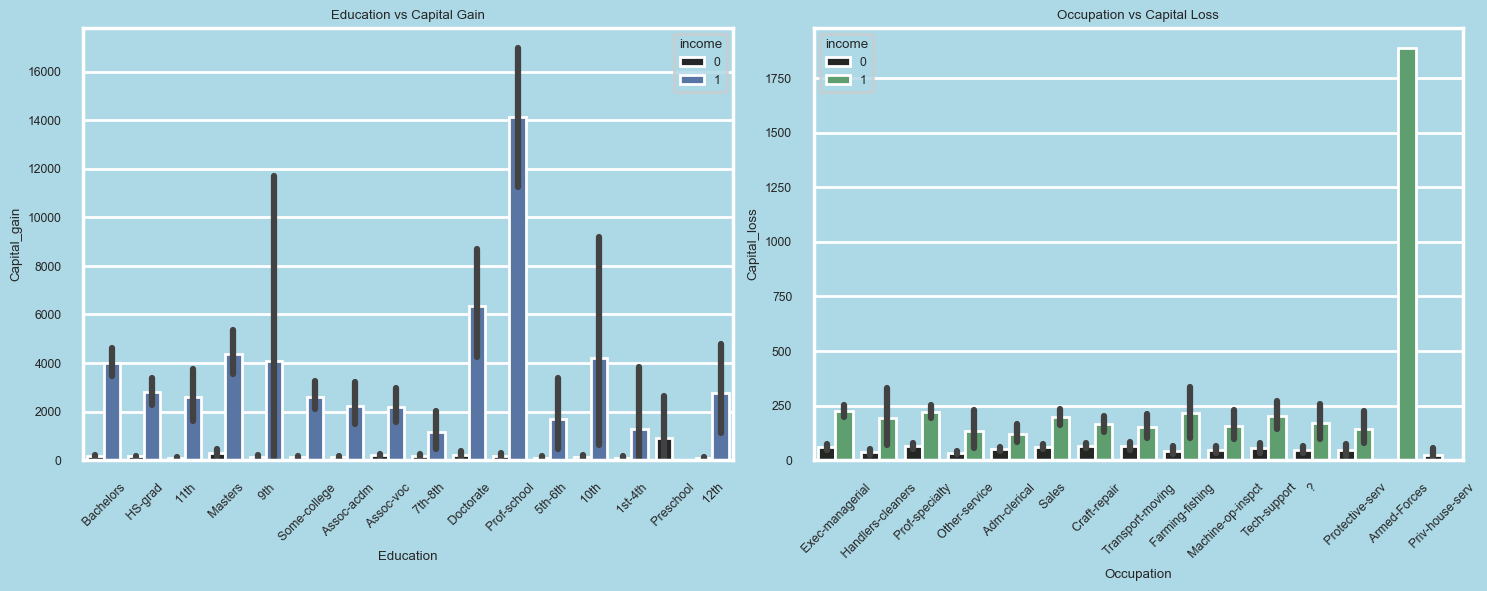

In [31]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=df['Education'], y=df['Capital_gain'], color='b', ax=axs[0], hue=df['income'])
axs[0].set_title('Education vs Capital Gain')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x=df['Occupation'], y=df['Capital_loss'], color='g', ax=axs[1], hue=df['income'])
axs[1].set_title('Occupation vs Capital Loss')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**By the plot,**

 **- The left plot shows that individuals with professional school degrees have very high capital gains, with incomes greater than 50K compared to others.**
 
 **- The right plot shows that individuals in the armed forces have significant capital losses with incomes grater than 50K compared to others.**

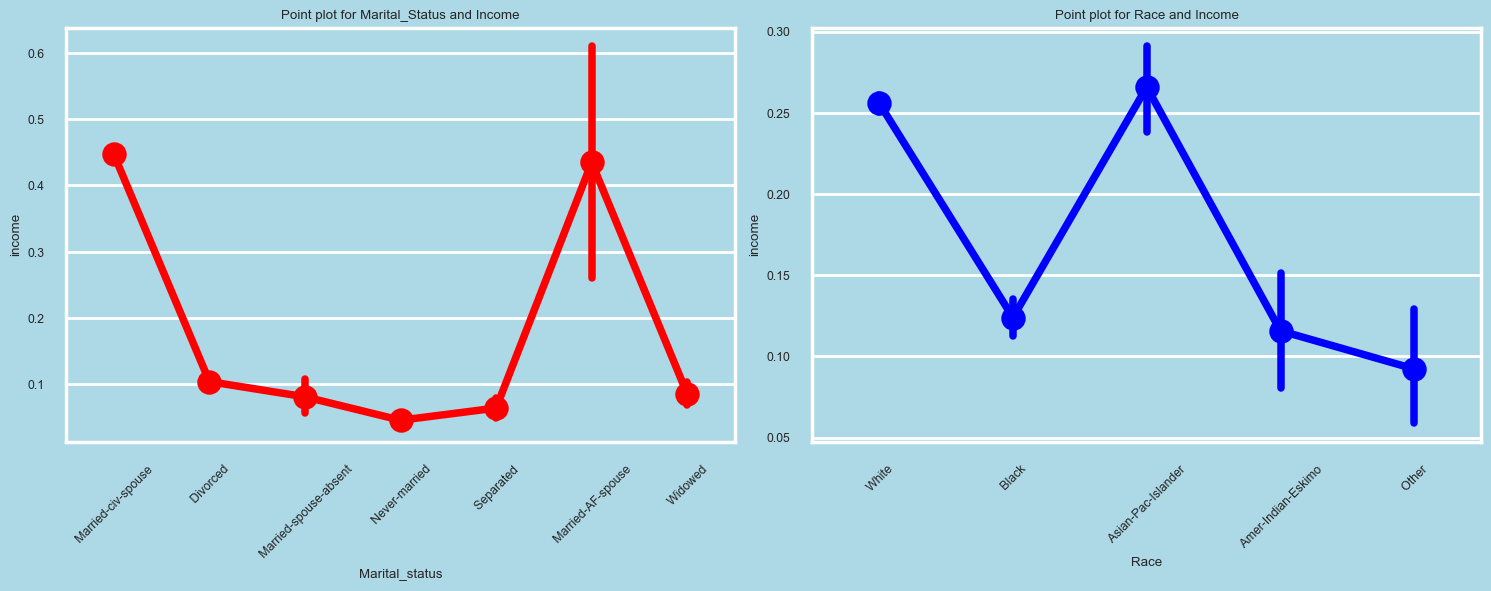

In [32]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.pointplot(x=df['Marital_status'], y=df['income'],ax=axs[0], color='red').set_title('Point plot for Marital_Status and Income')
axs[0].tick_params(axis='x', rotation=45)

sns.pointplot(x=df['Race'], y=df['income'], ax=axs[1], color='blue').set_title('Point plot for Race and Income')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**By observation,**

**- In the left plot,the point for the person who has civilian spouse is significantly higher than others.So we can conclude that civilian couples tend to have better income.**

  **- In the right plot, the point shows asian pacific individuals generally have a higher income as compared to other race group.**

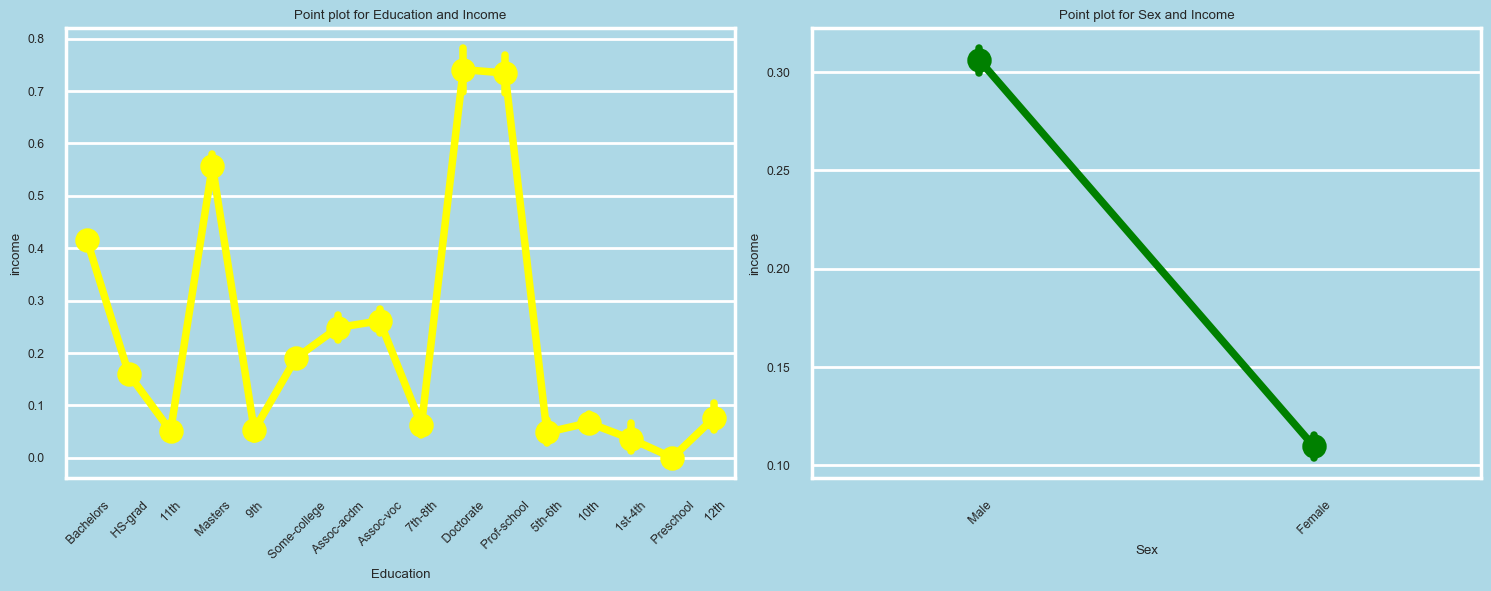

In [33]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.pointplot(x=df['Education'], y=df['income'],ax=axs[0], color='yellow').set_title('Point plot for Education and Income')
axs[0].tick_params(axis='x', rotation=45)

sns.pointplot(x=df['Sex'], y=df['income'], ax=axs[1], color='green').set_title('Point plot for Sex and Income')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**By observation,**

**- In the left plot,the point for the person who has Doctorate and professional degree is significantly higher income than others.**

  **- In the right plot, the point shows Male individuals generally have a higher income as compared to female.**

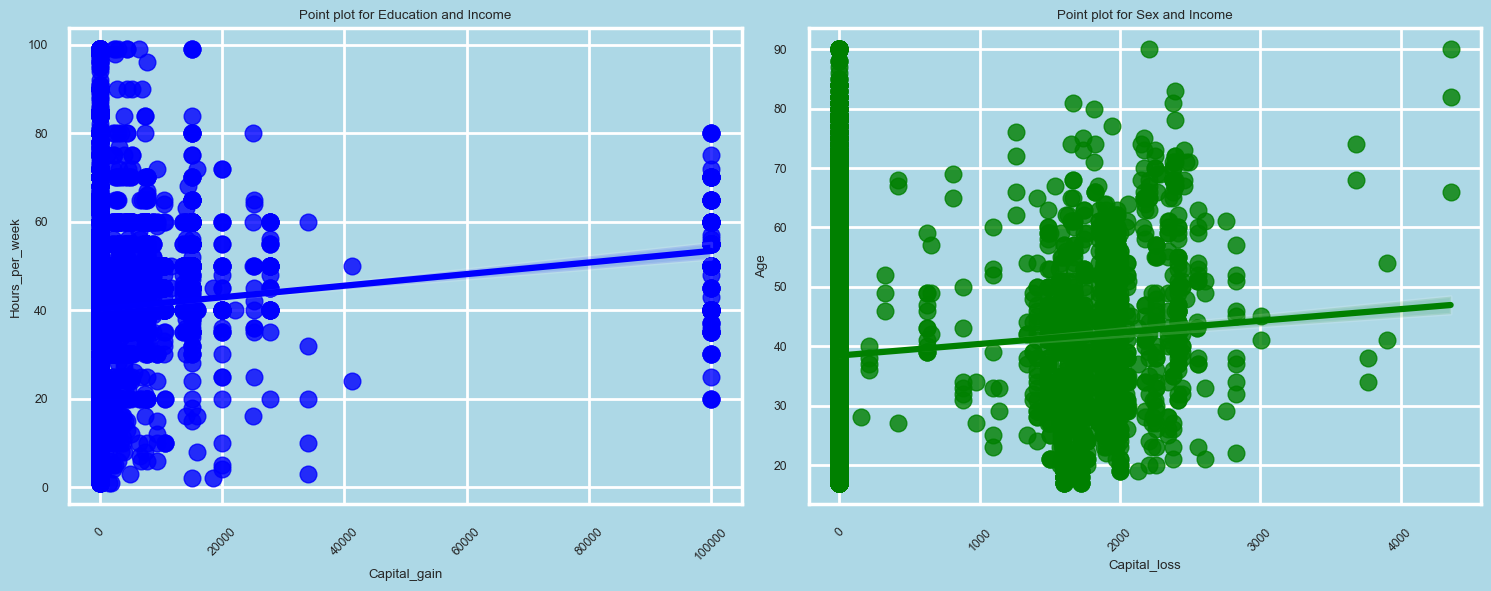

In [34]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.regplot(y=df['Hours_per_week'], x=df['Capital_gain'],ax=axs[0], color='blue').set_title('Point plot for Education and Income')
axs[0].tick_params(axis='x', rotation=45)

sns.regplot(x=df['Capital_loss'], y=df['Age'], ax=axs[1], color='green').set_title('Point plot for Sex and Income')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

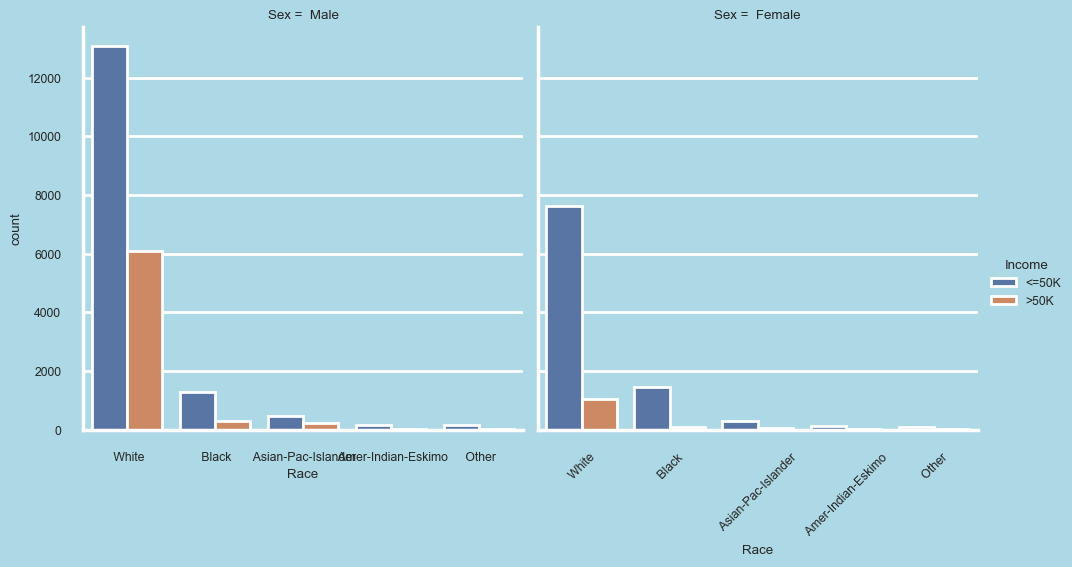

In [35]:
sns.catplot(x=df['Race'], col=df['Sex'],  hue=df['Income'], kind='count')
plt.xticks(rotation=45)
plt.show()

**- This plot shows, White male individuals have higher income and income also greater than $50,000 as compared to white female.**

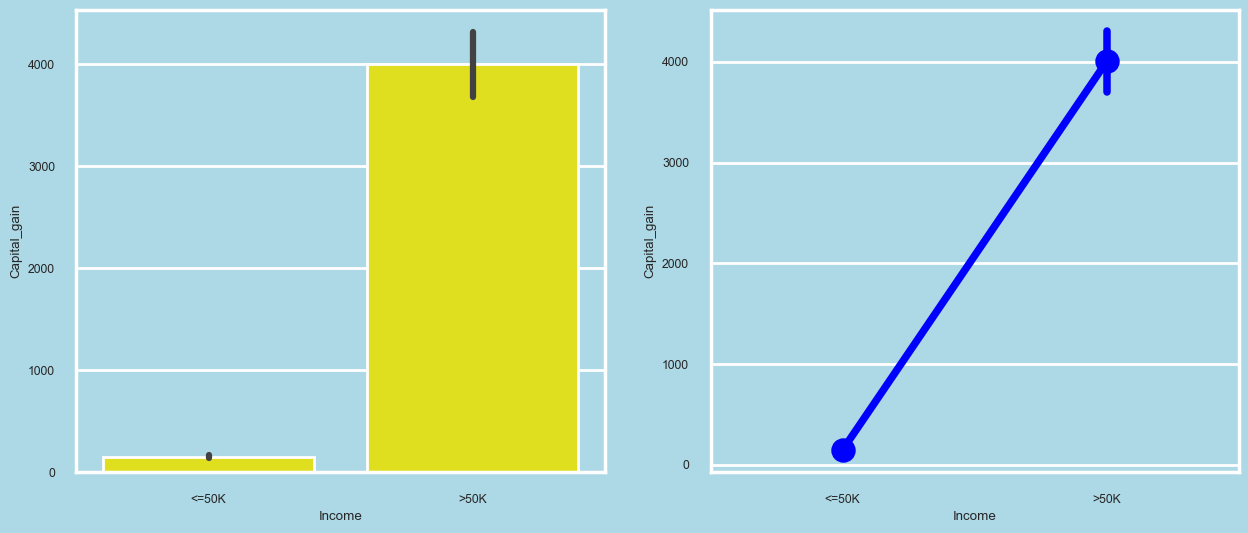

In [36]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=df['Income'], y=df['Capital_gain'], ax=axs[0], color='yellow')
sns.pointplot(x=df['Income'], y=df['Capital_gain'], ax=axs[1], color='Blue')
plt.show()

**By observation,**

**- In the plot, those with an income of more than $50,000 have significantly higher capital gains compared to others.**

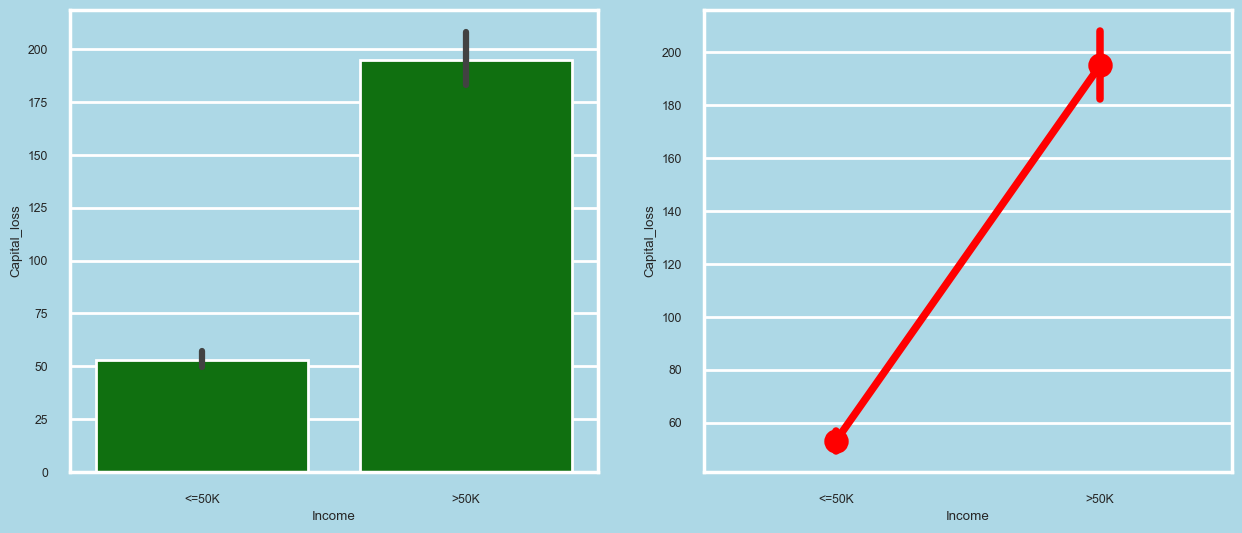

In [37]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=df['Income'], y=df['Capital_loss'], ax=axs[0], color='Green')
sns.pointplot(x=df['Income'], y=df['Capital_loss'], ax=axs[1], color='Red')
plt.show()

**By observation,**

**- In the plot, those with an income of more than $50,000 have significantly higher capital loss compared to others.**

**Multivariate analysis**

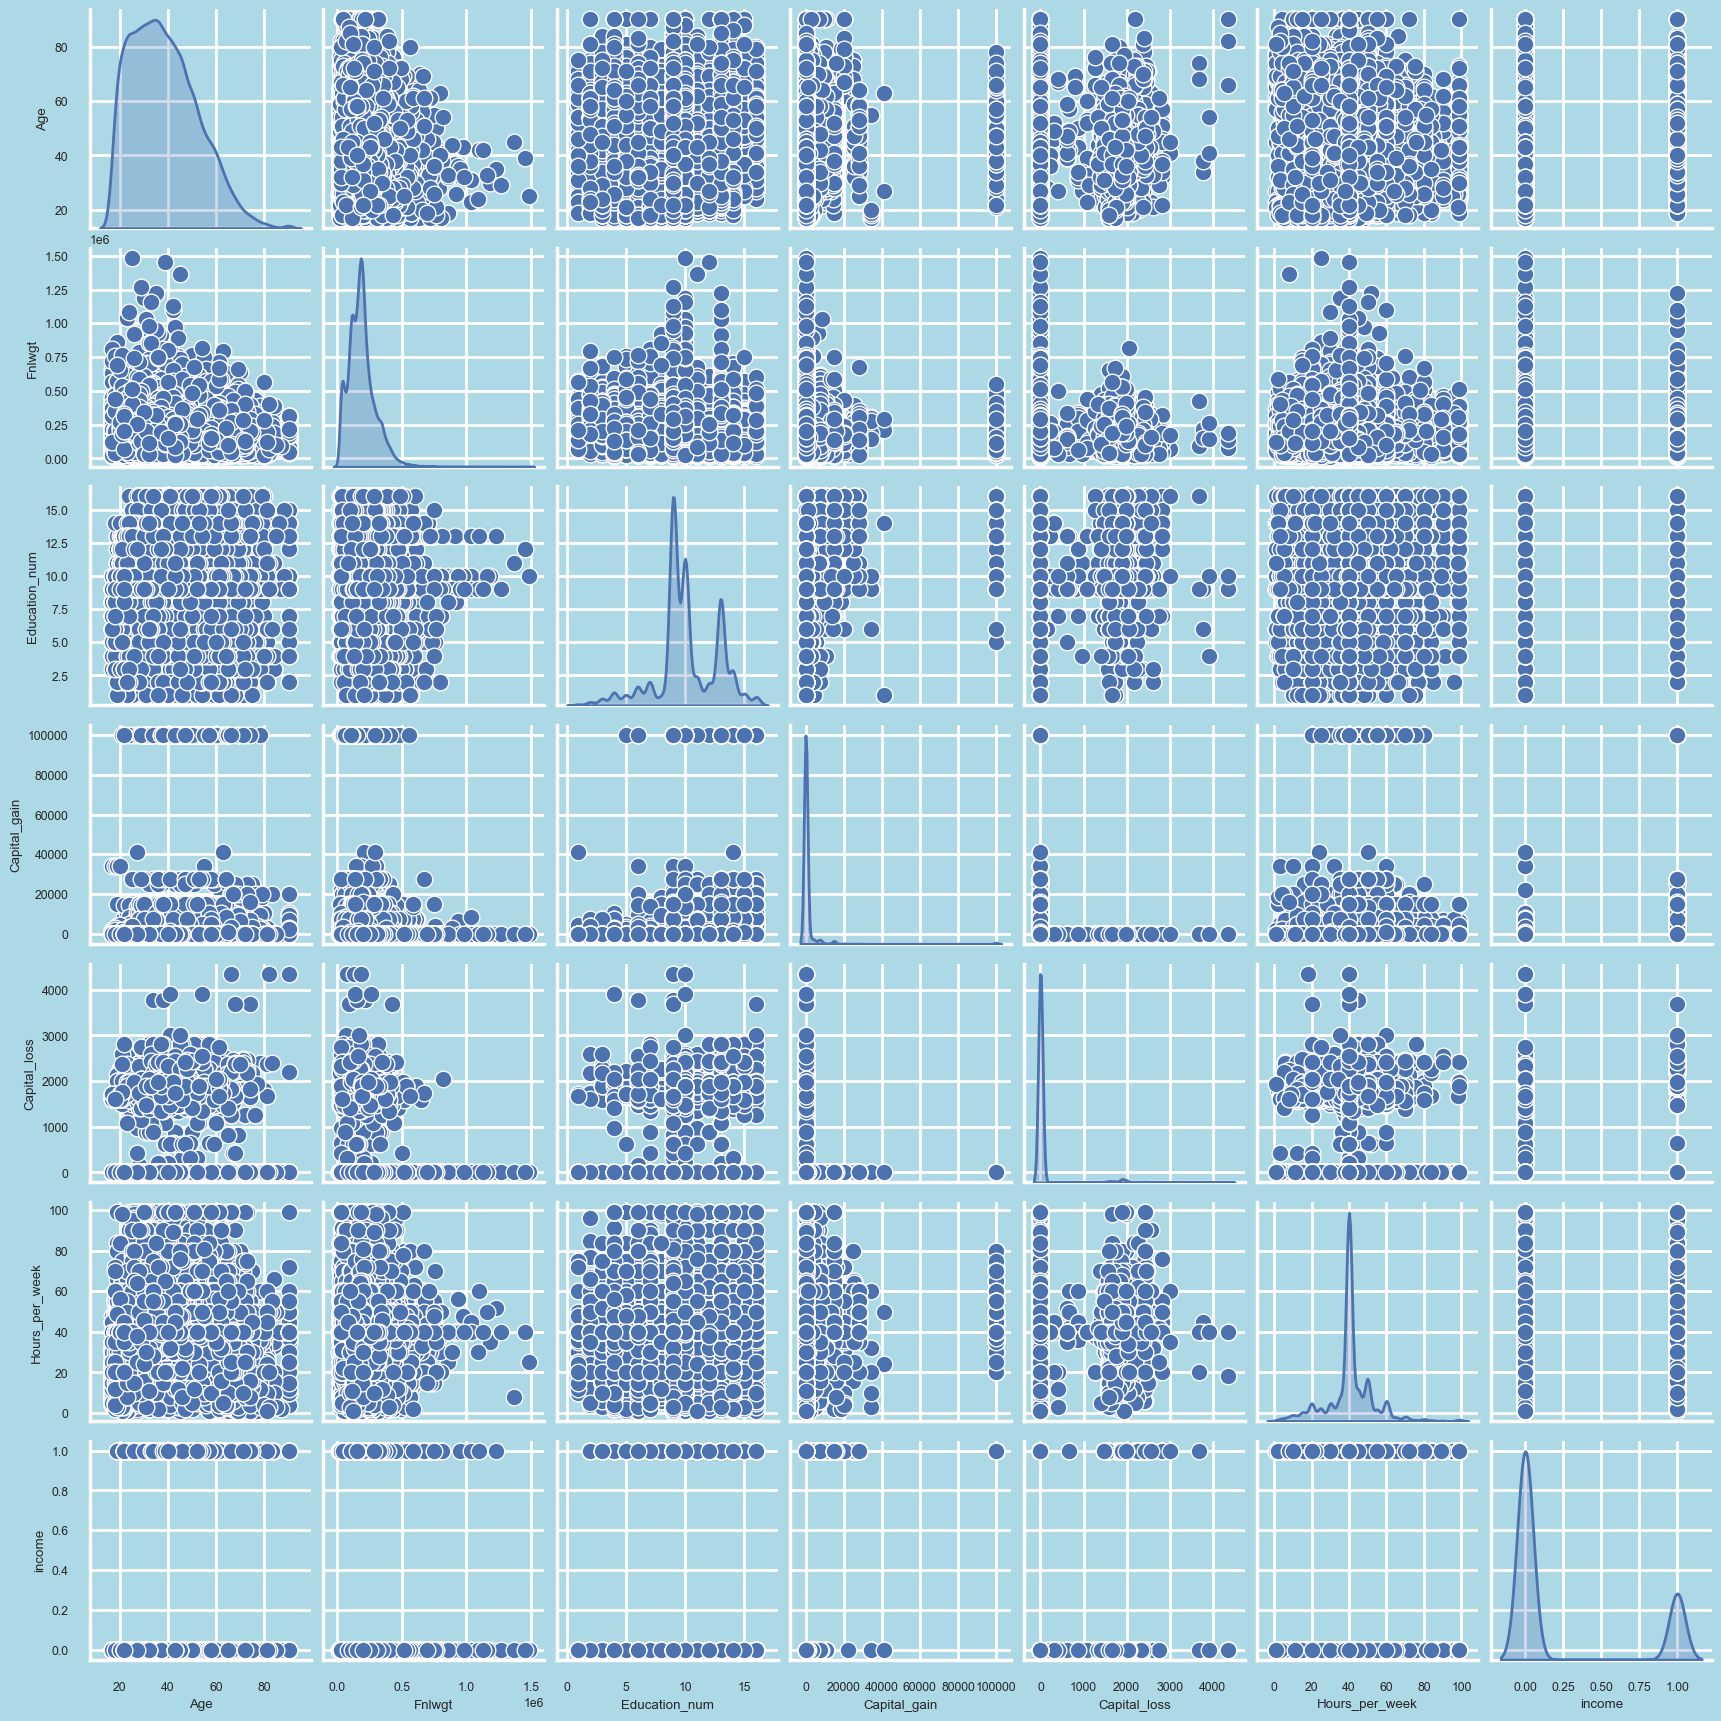

In [38]:
sns.pairplot(data=df, diag_kind='kde')
plt.show()

**Encode categorical Feature**

In [39]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
        
        
df.head() 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0,0


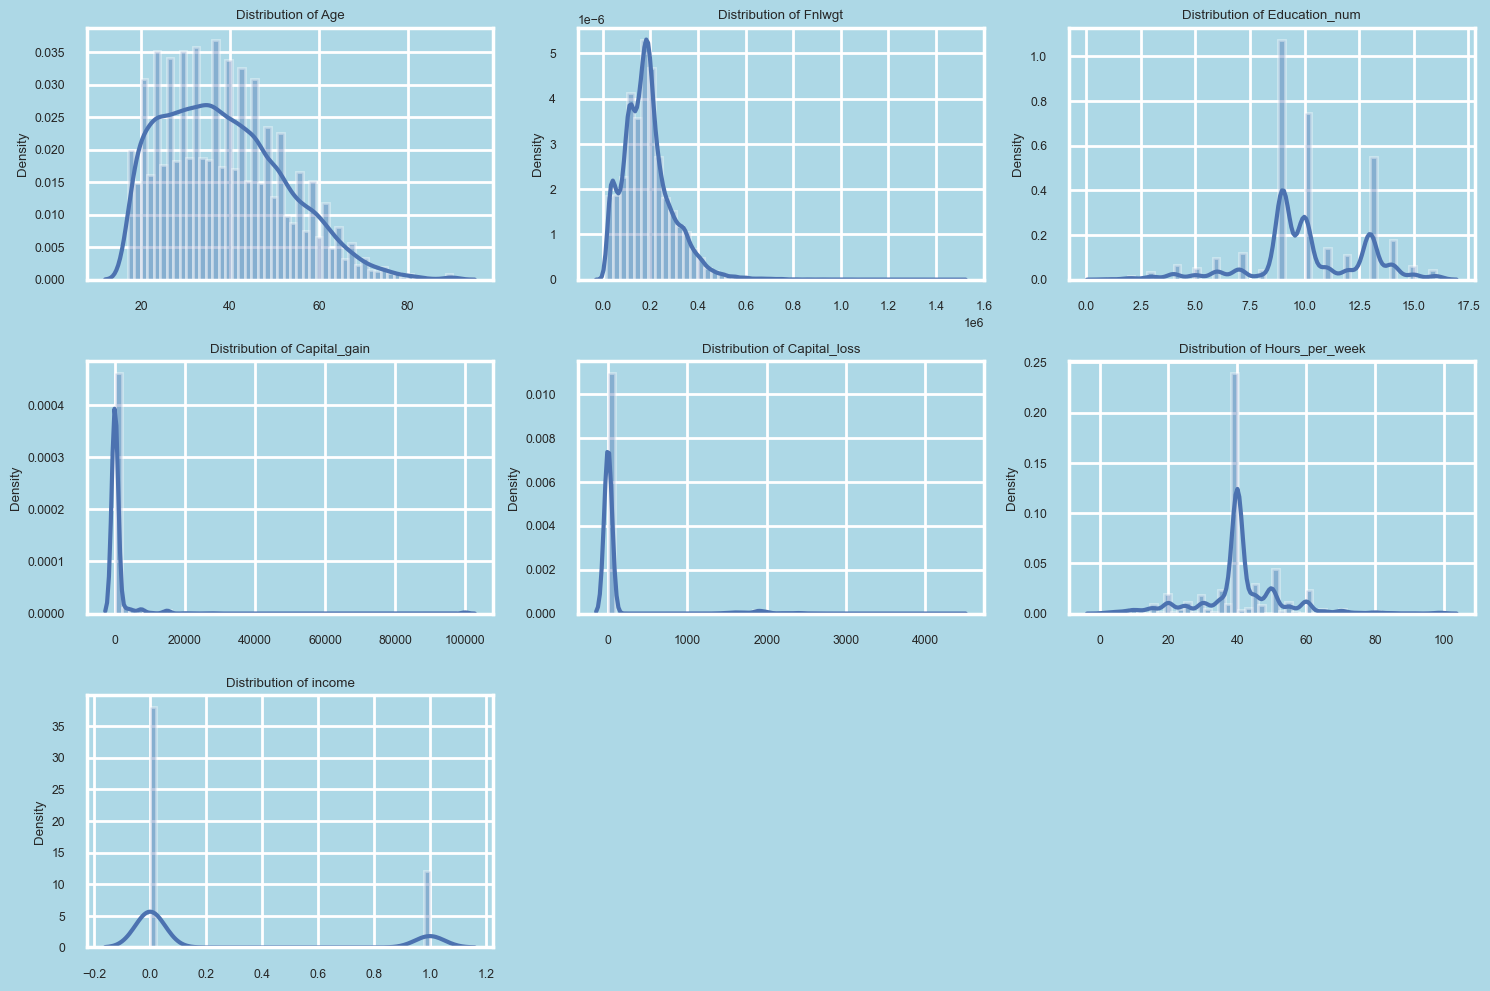

In [40]:
plt.figure(figsize=(15,10))
p=1

for col in df.select_dtypes(include=['int64']).columns:
    if p < 10:
        ax=plt.subplot(3,3,p)
        sns.distplot(x=df[col])
        plt.title(f'Distribution of {col}')
    p+=1
plt.tight_layout()

**- By the distribution plot, we see that there some of features are not normally distributed.**

**Correlation Analysis**

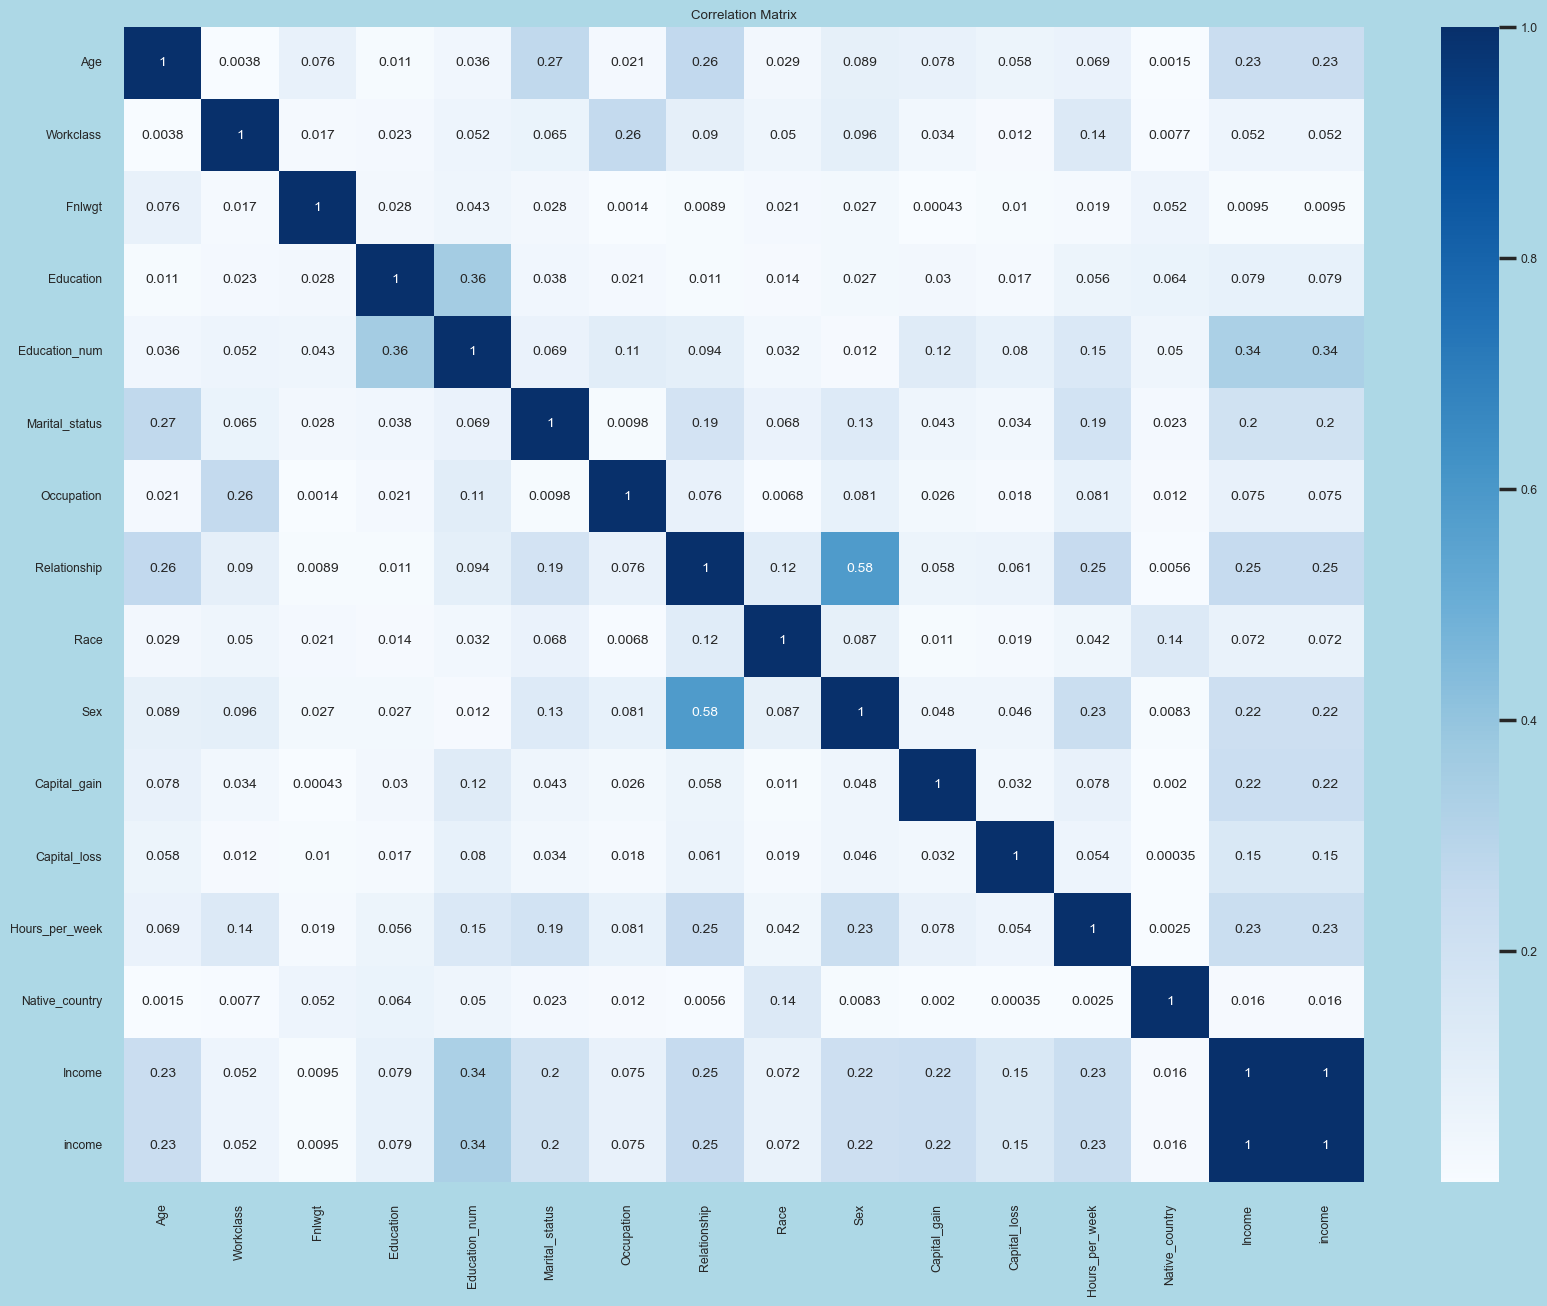

In [41]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, annot_kws={'size' : 10}, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [42]:
df.corr()['income'].sort_values(ascending=False)

Income            1.000000
income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Capital_loss      0.150498
Education         0.079361
Occupation        0.075398
Race              0.071855
Workclass         0.051706
Native_country    0.015623
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: income, dtype: float64

**CHECK OUTLIER**

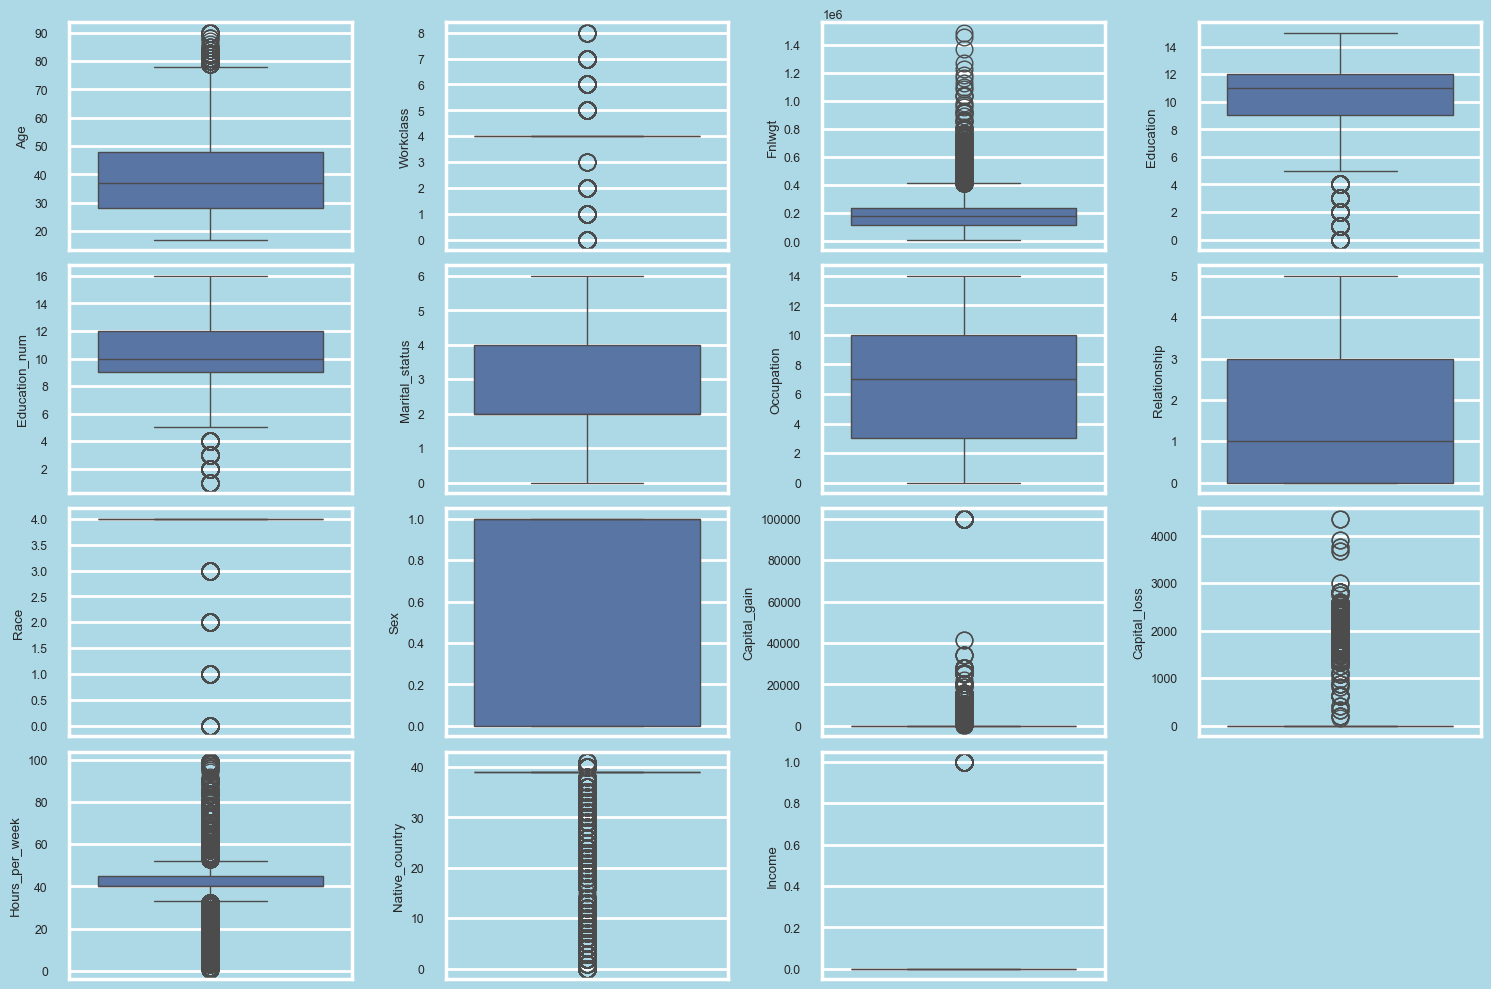

In [43]:
plt.figure(figsize=(15, 10))
p=1
for col in df.columns:
    if p < 16 :
        ax = plt.subplot(4,4,p)
        sns.boxplot(df[col])
    p +=1    
    
plt.tight_layout()

**- The box plot reveals that some numerical columns contain outliers. To ensure model stability and performance, we need to remove these outliers or unnecessary data from the dataset. Therefore, we will use the z-score method to eliminate them.**

**- We do not bother the outlier for categorical column.**

In [44]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df))

# Identify outliers
outlier_mask = (z_scores > 3.8).any(axis=1)

# Remove outliers
x = df[~outlier_mask]

# Check the number of rows after removing outliers
print("Number of rows after removing outliers:", x.shape[0])

Number of rows after removing outliers: 29579


In [45]:
print('Old Dtaframe size : ',df.shape[0])
print('New Dtaframe size : ',x.shape[0])

Old Dtaframe size :  32536
New Dtaframe size :  29579


In [46]:
print('Data Loss Percentage : ',((df.shape[0]-x.shape[0])/df.shape[0])*100)

Data Loss Percentage :  9.08839439390214


In [47]:
X = x.drop(columns=['Income','income'])
y = x['income']

**Balance the dataset**

In [48]:
y.value_counts()

0    22926
1     6653
Name: income, dtype: int64

In [49]:
# balance the dataset
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y1 = SM.fit_resample(X,y)

**Feature Importance**

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x, y1)

# Get feature importances
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the top 12 features
top_features = feature_importance_df.head(12)

print(top_features)

           Feature  Importance
5   Marital_status    0.193568
0              Age    0.139130
2           Fnlwgt    0.112640
7     Relationship    0.100363
12  Hours_per_week    0.089574
4    Education_num    0.088787
3        Education    0.077970
10    Capital_gain    0.066883
6       Occupation    0.059235
1        Workclass    0.036259
9              Sex    0.011716
13  Native_country    0.011016


In [51]:
# Extract the names of the top features
x1 = pd.DataFrame(x, columns=top_features['Feature'].values)
x1.head(3)

,Marital_status,Age,Fnlwgt,Relationship,Hours_per_week,Education_num,Education,Capital_gain,Occupation,Workclass,Sex,Native_country
0,2,50,83311,0,13,13,9,0,4,6,1,39
1,0,38,215646,1,40,9,11,0,6,4,1,39
2,2,53,234721,0,40,7,1,0,6,4,1,39


**FEATURE SCALING**

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

**REMOVE SKEWNESS**

In [53]:
x2.skew()

Marital_status    0.308722
Age               0.342385
Fnlwgt            0.816276
Relationship      1.114902
Hours_per_week   -0.264785
Education_num    -0.428992
Education        -0.963914
Capital_gain      3.652605
Occupation        0.102279
Workclass        -0.745257
Sex              -0.810573
Native_country   -4.668564
dtype: float64

**- we check the skewness only for numerical feature not for categorical.**

**- Fnlwgt, capital gain these four numerical columns has skewness.So we remove it for normal distribution.**

In [54]:
x2['Fnlwgt'] = np.cbrt(x2['Fnlwgt'])

In [54]:
x2['Capital_gain'] = np.cbrt(np.log(x2['Capital_gain'] + 1))

In [63]:
x2['Capital_gain'] = np.cbrt(x2['Capital_gain'])

In [64]:
x2.skew()

Marital_status    0.308722
Age               0.342385
Fnlwgt            0.816276
Relationship      1.114902
Hours_per_week   -0.264785
Education_num    -0.428992
Education        -0.963914
Capital_gain      2.252476
Occupation        0.102279
Workclass        -0.745257
Sex              -0.810573
Native_country   -4.668564
dtype: float64

**- Based on observation, there is no skewness present now except capital gain.**

**To check Multicolinearity using VIF method**

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
f = x2.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(len(f))]
df1 = pd.DataFrame(d)

df1

,Feature,VIF
0,Marital_status,1.142340
1,Age,1.168978
2,Fnlwgt,1.013043
3,Relationship,1.736723
4,Hours_per_week,1.159750
5,Education_num,1.163834
6,Education,1.097527
7,Capital_gain,1.017237
8,Occupation,1.077250
9,Workclass,1.070732


**- Upon reviewing the VIF values, all values were found to be less than 5, indicating that there is no multicollinearity present.**

**- Now our data is clear.Now we proceed to build the model using ML algorithms.**

# Model Building

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x2,y1,test_size= 0.30, random_state=42)

In [69]:
def eval_score(clf, x_train, y_train, x_test, y_test):
    train_accu= accuracy_score(clf.predict(x_train),y_train)*100
    y_pred = clf.predict(x_test)
    test_accu= accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test,y_pred)
    c_report = classification_report(y_test,y_pred)
    return train_accu,test_accu,cm,c_report

In [70]:
def validate(model, x_train, y_train):
    k = KFold(n_splits=5)
    score = cross_val_score(model, x_train, y_train, cv=k)
    print("Cross Validation Score : {}".format(score))
    print("Average Cross Validation Score : {}".format(score.mean()))
    print("\n------------------")
    difference = (accuracy_score(y_test,y_pred) - score.mean())
    return difference

In [71]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Extra Trees Classifier', ExtraTreesClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier())
]

# Model Evaluation

In [72]:
for name, clf in models:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    train_accu, test_accu, cm, c_report = eval_score(clf, x_train, y_train, x_test, y_test)
    
    print(f"{name} Metrics:")
    print('---------------------------------------------------')
    print(f"Train Accuracy: {train_accu:.2f}%")
    print(f"Test Accuracy: {test_accu:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", c_report)
    
    difference = validate(clf, x_train, y_train)
    print(f"Difference between test accuracy and average cross-validation score: {difference:.4f}")
    print("="*50)

Logistic Regression Metrics:
---------------------------------------------------
Train Accuracy: 76.51%
Test Accuracy: 77.03%
Confusion Matrix:
 [[5103 1772]
 [1388 5493]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      6875
           1       0.76      0.80      0.78      6881

    accuracy                           0.77     13756
   macro avg       0.77      0.77      0.77     13756
weighted avg       0.77      0.77      0.77     13756

Cross Validation Score : [0.75981308 0.76896713 0.76257984 0.76725347 0.76663032]
Average Cross Validation Score : 0.7650487673131605

------------------
Difference between test accuracy and average cross-validation score: 0.0052
Random Forest Classifier Metrics:
---------------------------------------------------
Train Accuracy: 100.00%
Test Accuracy: 88.97%
Confusion Matrix:
 [[6142  733]
 [ 784 6097]]
Classification Report:
               precision    recall  f1-score  

***By evaluation,***

   **- From the model evaluation, we observe that two algorithms, Random Forest and ExtraTrees Classifier perform well and provide precise results but when we compare both models the Random Forest Classifier stands out as the best model for our dataset.** 


**Random Forest and ExtraTrees Classifier are stands out as the best model for the following reasons:**


   1) The Random Forest achieved a test accuracy of 88.97%, which is the highest among all the models evaluated.
   
   2) Strong Classification Metrics:
    Precision and Recall: It has very high precision (0.89 for class 1.0) and recall (0.89 for class 1.0), indicating that it performs well in identifying positive cases with minimal false positives and false negatives.
    F1-Score: The F1-score for class 1.0 is 0.89, demonstrating a good balance between precision and recall.
    
   3)  The average cross-validation score of 0.8893 is also high, showing that the model generalizes well across different subsets of the data.
   
   4)  Although the training accuracy is 100%, the test accuracy remains high at 88.97%, which indicates that the model is not overly complex for the data at hand, minimizing the risk of overfitting.

# Model Tuning

In [73]:
n = {
    'n_estimators' : [100,150],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : [2,1],
    'min_samples_leaf' : [3,1],
    'max_features' : ['sqrt', 'log2']
}

In [74]:
R = GridSearchCV(RandomForestClassifier(), param_grid=n, cv=5, scoring='accuracy')
R.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 1],
                         'min_samples_split': [2, 1],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [75]:
R.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
final_model = RandomForestClassifier(criterion= 'gini', max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)
print('Testing Accuracy : {:.2f} %'.format(round(accuracy_score(y_test, y_pred) * 100, 2)))
print('-----------------------------------------------')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Testing Accuracy : 89.04 %
-----------------------------------------------
[[6160  715]
 [ 792 6089]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6875
           1       0.89      0.88      0.89      6881

    accuracy                           0.89     13756
   macro avg       0.89      0.89      0.89     13756
weighted avg       0.89      0.89      0.89     13756



# Save the model

In [77]:
import joblib
joblib.dump(final_model,'Census Income.pkl')

['Census Income.pkl']

In [78]:
# Load the model
l = joblib.load('Census Income.pkl')

In [79]:
pred = l.predict(x_test)

actual = np.array(y_test)

In [80]:
pd.DataFrame({
    'Actual' : actual,
    'Prediction' : pred
})

,Actual,Prediction
0,0,0
1,1,0
2,1,1
3,0,0
4,0,1
...,...,...
13751,0,0
13752,1,1
13753,1,1
13754,1,1
